In [78]:
import numpy as np, pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt, seaborn as sns
import scipy
import warnings
import plotly.express as px
from itertools import product
import statsmodels.api as sm
import datetime
from tqdm import tqdm
warnings.filterwarnings('ignore')

**analyze of different type of vaccines taken by each country**

In [79]:
data = pd.read_csv("country_vaccinations.csv")
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [80]:
data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,4.889000e+03,4.338000e+03,2.961000e+03,4.112000e+03,7.709000e+03,4889.000000,4338.000000,2961.000000,7709.000000
mean,2.564337e+06,2.046262e+06,8.760931e+05,9.064633e+04,6.103320e+04,9.867423,7.580922,3.589338,2691.696848
std,9.240731e+06,6.713298e+06,3.526087e+06,2.854173e+05,2.126771e+05,17.648181,11.961527,7.695151,4183.033138
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.967500e+04,3.635900e+04,1.901900e+04,2.708750e+03,1.036000e+03,0.780000,0.800000,0.400000,365.000000
50%,2.725540e+05,2.479645e+05,1.095010e+05,1.374850e+04,6.241000e+03,3.720000,3.190000,1.470000,1291.000000
75%,1.285437e+06,9.996468e+05,4.820470e+05,5.653450e+04,2.798200e+04,10.820000,8.460000,3.200000,3117.000000
max,1.282170e+08,8.393050e+07,4.553396e+07,4.575496e+06,2.541597e+06,159.870000,89.550000,70.320000,54264.000000


In [81]:
pd.to_datetime(data.date)
data.country.value_counts()

Wales                100
Scotland             100
United Kingdom       100
Canada               100
England              100
                    ... 
Taiwan                 2
Bahamas                1
Laos                   1
Equatorial Guinea      1
Guinea                 1
Name: country, Length: 151, dtype: int64

In [82]:
data = data[data.country.apply(lambda x: x not in ["England", "Scotland", "Wales", "Northern Ireland"])]
data.country.value_counts()

Canada               100
United Kingdom       100
China                 99
Russia                99
Israel                95
                    ... 
Taiwan                 2
Bahamas                1
Equatorial Guinea      1
Guinea                 1
Laos                   1
Name: country, Length: 147, dtype: int64

In [83]:
data.vaccines.value_counts()

Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          1961
Pfizer/BioNTech                                                                       1284
Oxford/AstraZeneca                                                                     929
Oxford/AstraZeneca, Pfizer/BioNTech                                                    609
Moderna, Pfizer/BioNTech                                                               410
Sputnik V                                                                              309
Pfizer/BioNTech, Sinovac                                                               218
Sinovac                                                                                203
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V                      165
Sinopharm/Beijing                                                                      163
Oxford/AstraZeneca, Sinovac                                                            142

In [84]:
df = data[["vaccines", "country"]]
df.head()

,vaccines,country
0,Oxford/AstraZeneca,Afghanistan
1,Oxford/AstraZeneca,Afghanistan
2,Oxford/AstraZeneca,Afghanistan
3,Oxford/AstraZeneca,Afghanistan
4,Oxford/AstraZeneca,Afghanistan


In [85]:
dict_ = {}
for i in df.vaccines.unique():
  dict_[i] = [df["country"][j] for j in df[df["vaccines"]==i].index]

vaccines = {}
for key, value in dict_.items():
  vaccines[key] = set(value)
for i, j in vaccines.items():
  print(f"{i}:>>{j}")

Oxford/AstraZeneca:>>{'Belize', 'Saint Lucia', 'El Salvador', 'Antigua and Barbuda', "Cote d'Ivoire", 'Montserrat', 'Saint Helena', 'Anguilla', 'Nepal', 'Moldova', 'Vietnam', 'Sri Lanka', 'Angola', 'Myanmar', 'Bahamas', 'Suriname', 'Barbados', 'Afghanistan', 'Ghana', 'Saint Vincent and the Grenadines', 'Maldives', 'Nigeria', 'Kenya', 'Mauritius', 'Saint Kitts and Nevis', 'Trinidad and Tobago', 'Taiwan', 'Grenada', 'Mongolia', 'Bangladesh', 'Jamaica', 'Falkland Islands', 'Malawi', 'Ukraine', 'Dominica', 'Guyana', 'Uganda'}
Pfizer/BioNTech:>>{'Japan', 'Turks and Caicos Islands', 'Kuwait', 'North Macedonia', 'Greenland', 'Monaco', 'Qatar', 'Cyprus', 'Albania', 'Gibraltar', 'Cayman Islands', 'New Zealand', 'Lebanon', 'Croatia', 'Guernsey', 'Bermuda', 'Costa Rica', 'Andorra', 'Ecuador', 'Panama', 'Slovakia'}
Sputnik V:>>{'Iran', 'Algeria', 'Belarus', 'Kazakhstan', 'Paraguay', 'Guinea', 'Bolivia', 'Venezuela', 'San Marino'}
Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V:>>{'Pakistan', 'Arg

In [86]:

import plotly.express as px
import plotly.offline as py

vaccine_map = px.choropleth(data, locations = 'iso_code', color = 'vaccines')
vaccine_map.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
vaccine_map.show()

**analyze of different type of vaccines taken by each country (manufacturers data)**

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("manufacturer.csv")
data.head()

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Moderna,2
1,Argentina,2020-12-29,Oxford/AstraZeneca,3
2,Argentina,2020-12-29,Sinopharm/Beijing,1
3,Argentina,2020-12-29,Sputnik V,20481
4,Argentina,2020-12-30,Moderna,2


In [88]:
data.describe()

,total_vaccinations
count,3.562300e+04
mean,1.508357e+07
std,5.181768e+07
min,0.000000e+00
25%,9.777600e+04
50%,1.305506e+06
75%,7.932423e+06
max,6.005200e+08


In [89]:
pd.to_datetime(data.date)
data.location.value_counts()

European Union    4122
Argentina         2629
Germany           2290
South Korea       1985
Latvia            1664
Czechia           1661
France            1652
Italy             1639
Chile             1493
Ukraine           1491
Romania           1490
Switzerland       1386
Ecuador           1278
United States     1192
Uruguay           1188
Peru              1140
Hong Kong          784
Portugal           382
Hungary            339
Austria            320
Netherlands        320
Belgium            320
Iceland            304
Poland             281
Finland            260
Sweden             256
Denmark            254
Spain              252
Croatia            250
Norway             245
Ireland            244
Luxembourg         243
Malta              238
Estonia            237
Bulgaria           235
Slovakia           234
Lithuania          232
Cyprus             230
Japan              225
Slovenia           224
Liechtenstein      189
Nepal              175
South Africa        50
Name: locat

In [90]:
data = data[data.location.apply(lambda x: x not in ["England", "Scotland", "Wales", "Northern Ireland"])]
data.location.value_counts()

European Union    4122
Argentina         2629
Germany           2290
South Korea       1985
Latvia            1664
Czechia           1661
France            1652
Italy             1639
Chile             1493
Ukraine           1491
Romania           1490
Switzerland       1386
Ecuador           1278
United States     1192
Uruguay           1188
Peru              1140
Hong Kong          784
Portugal           382
Hungary            339
Austria            320
Netherlands        320
Belgium            320
Iceland            304
Poland             281
Finland            260
Sweden             256
Denmark            254
Spain              252
Croatia            250
Norway             245
Ireland            244
Luxembourg         243
Malta              238
Estonia            237
Bulgaria           235
Slovakia           234
Lithuania          232
Cyprus             230
Japan              225
Slovenia           224
Liechtenstein      189
Nepal              175
South Africa        50
Name: locat

In [91]:
data.vaccine.value_counts()

Pfizer/BioNTech       8888
Moderna               6641
Oxford/AstraZeneca    6633
Johnson&Johnson       5514
Sinovac               2413
Novavax               1692
Sinopharm/Beijing     1502
Sputnik V              977
CanSino                894
Covaxin                469
Name: vaccine, dtype: int64

In [92]:
df = data[["vaccine", "location"]]
df.head()

,vaccine,location
0,Moderna,Argentina
1,Oxford/AstraZeneca,Argentina
2,Sinopharm/Beijing,Argentina
3,Sputnik V,Argentina
4,Moderna,Argentina


In [93]:
dict_ = {}
for i in df.vaccine.unique():
  dict_[i] = [df["location"][j] for j in df[df["vaccine"]==i].index]

vaccine = {}
for key, value in dict_.items():
  vaccine[key] = set(value)
for i, j in vaccine.items():
  print(f"{i}:>>{j}")

Moderna:>>{'Finland', 'Japan', 'Estonia', 'Latvia', 'European Union', 'Sweden', 'Switzerland', 'Spain', 'Germany', 'Lithuania', 'South Korea', 'Austria', 'Portugal', 'Nepal', 'Bulgaria', 'Cyprus', 'Liechtenstein', 'Italy', 'Hungary', 'Malta', 'Norway', 'Argentina', 'Croatia', 'Denmark', 'Netherlands', 'Iceland', 'Slovenia', 'Romania', 'Luxembourg', 'Belgium', 'Czechia', 'Ukraine', 'France', 'Ireland', 'Poland', 'Slovakia', 'United States'}
Oxford/AstraZeneca:>>{'Finland', 'Estonia', 'Latvia', 'European Union', 'Sweden', 'Spain', 'Germany', 'Lithuania', 'South Korea', 'Austria', 'Portugal', 'Nepal', 'Bulgaria', 'Cyprus', 'Italy', 'Hungary', 'Malta', 'Norway', 'Argentina', 'Peru', 'Chile', 'Croatia', 'Denmark', 'Netherlands', 'Iceland', 'Slovenia', 'Romania', 'Luxembourg', 'Belgium', 'Czechia', 'Ukraine', 'France', 'Ireland', 'Ecuador', 'Poland', 'Slovakia', 'Uruguay'}
Sinopharm/Beijing:>>{'Argentina', 'Nepal', 'Peru', 'Latvia', 'European Union', 'Hungary', 'Portugal'}
Sputnik V:>>{'Slov

***Trying different analysis to predict the future***

In [94]:
data = pd.read_csv("country_vaccinations.csv")

In [95]:
data.shape

(7897, 15)

In [96]:
#checking missign data
data.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     3008
people_vaccinated                      3559
people_fully_vaccinated                4936
daily_vaccinations_raw                 3785
daily_vaccinations                      188
total_vaccinations_per_hundred         3008
people_vaccinated_per_hundred          3559
people_fully_vaccinated_per_hundred    4936
daily_vaccinations_per_million          188
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [97]:
#as there is lot of missing data we drop total vaccines missing data
data = data.drop(data[data.total_vaccinations.isna()].index)

In [98]:
data.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                       621
people_fully_vaccinated                1929
daily_vaccinations_raw                  777
daily_vaccinations                      166
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred           621
people_fully_vaccinated_per_hundred    1929
daily_vaccinations_per_million          166
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [99]:
check_data = data.drop(data[data.people_vaccinated.isna()].index)

In [100]:
check_data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,NaN,NaN,2862.0,0.14,0.14,NaN,74.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
23,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://coronavirus.al/lajme/covid19-ministria...
25,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://coronavirus.al/lajme/covid19-ministria...


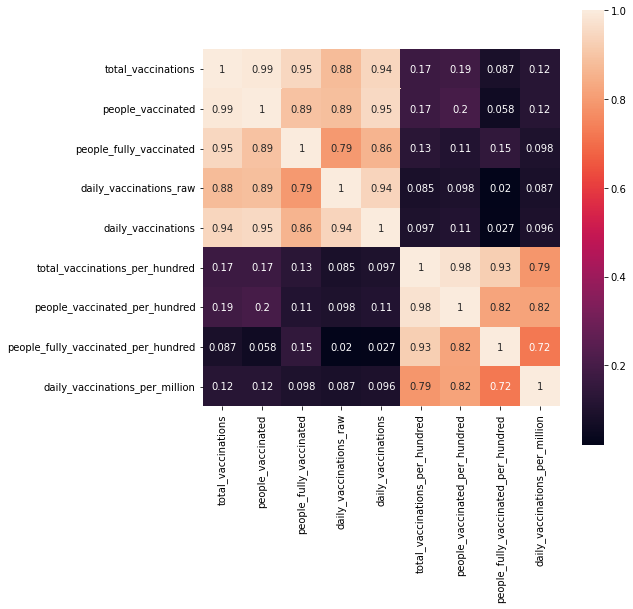

In [101]:
#understanding the corealtion b/w total_vaccinations_per_hundred's and people_vaccinated_per_hundred 
plt.subplots(figsize=(8, 8))
sns.heatmap(check_data.corr(), annot=True, square=True)
plt.show()

In [102]:
#Mann-Whithey U test 
scipy.stats.mannwhitneyu(check_data.total_vaccinations, check_data.people_vaccinated, alternative='two-sided')

MannwhitneyuResult(statistic=9529006.0, pvalue=0.0002163876922547399)

In [103]:
scipy.stats.mannwhitneyu(check_data.total_vaccinations_per_hundred, check_data.people_vaccinated_per_hundred, alternative='two-sided')

MannwhitneyuResult(statistic=9761400.0, pvalue=9.434676351422886e-09)

In [104]:
diff = check_data.total_vaccinations.mean() - check_data.people_vaccinated.mean()
diff_per_hundred = check_data.total_vaccinations_per_hundred.mean() - check_data.people_vaccinated_per_hundred.mean()

data.people_vaccinated = data.people_vaccinated.fillna(data.total_vaccinations - diff)
data.people_vaccinated_per_hundred = data.people_vaccinated_per_hundred.fillna(data.total_vaccinations_per_hundred - diff_per_hundred)

In [105]:
data.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                1929
daily_vaccinations_raw                  777
daily_vaccinations                      166
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred             0
people_fully_vaccinated_per_hundred    1929
daily_vaccinations_per_million          166
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [106]:
data.people_fully_vaccinated = data.people_fully_vaccinated.fillna(0)
data.people_fully_vaccinated_per_hundred = data.people_fully_vaccinated_per_hundred.fillna(0)

In [107]:
data.isna().sum()

country                                  0
iso_code                                 0
date                                     0
total_vaccinations                       0
people_vaccinated                        0
people_fully_vaccinated                  0
daily_vaccinations_raw                 777
daily_vaccinations                     166
total_vaccinations_per_hundred           0
people_vaccinated_per_hundred            0
people_fully_vaccinated_per_hundred      0
daily_vaccinations_per_million         166
vaccines                                 0
source_name                              0
source_website                           0
dtype: int64

In [108]:
data[data.iso_code.isna()].country.unique()

array([], dtype=object)

In [109]:
data[data.country == 'England'] = data[data.country == 'England'].fillna('GB-ENG')
data[data.country == 'Northern Ireland'] == data[data.country == 'Northern Ireland'].fillna('GB-NIR')
data[data.country == 'Scotland'] = data[data.country == 'Scotland'].fillna('GB-SCT')
data[data.country == 'Wales'] = data[data.country == 'Wales'].fillna('GB-WLS')
data = data.fillna('NC')

In [110]:
data.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64